# Bigraph-Builder Demo

In [1]:
from builder import Builder, Process, ProcessTypes

## Initialize the builder

In [2]:
core = ProcessTypes()
b = Builder(core=core)

In [3]:
core.process_registry

In [4]:
core.type_registry

### register new types

In [5]:
b.register_type(
    'default 1', {
        '_inherit': 'float',
        '_default': 1.0})

In [6]:
b.list_types()

['integer',
 '',
 'luminosity/length^2',
 'tuple',
 'current^2*time^3/length^2*mass',
 'length/time',
 'substance/length^3',
 'current*time/mass',
 'length^2*mass/temperature*time^2',
 'current*length*time',
 'step',
 'printing_unit/length',
 'wires',
 'current^2*time^4/length^2*mass',
 'length^2/time^2',
 'length^1_5*mass^0_5/time^2',
 'mass^0_5/length^0_5*time',
 'length*mass/time^2',
 'process',
 'length^3/mass*time^2',
 'tree',
 'length/mass',
 'length^2*mass/time^2',
 '/substance',
 'length^4*mass/current*time^3',
 'substance',
 'length^0_5*mass^0_5/time',
 'length^2*mass/current^2*time^2',
 'time',
 'mass/length*time^2',
 'mass/current*time^2',
 'length^4*mass/time^3',
 'length^2*mass/current*time^2',
 'default 1',
 'list',
 'array',
 'length/time^2',
 'protocol',
 'length^2*mass/current^2*time^3',
 'current*time^2/length^2*mass',
 'length^3/time',
 'current*length^2',
 'length*mass/current*time^3',
 'temperature',
 'current',
 'length*mass/current^2*time^2',
 'current*length^2*t

## Register processes

### list built-in processes

In [7]:
b.list_processes()

['ram-emitter', 'console-emitter']

### register process with process class

In [8]:
from process_bigraph.experiments.minimal_gillespie import GillespieEvent
b.register_process('GillespieEvent', GillespieEvent)

### register process by address
currently only supports local addresses, but the plan is to support remote addresses and different protocols

In [9]:
b.register_process(
    'GillespieInterval',
    address='process_bigraph.experiments.minimal_gillespie.GillespieInterval',  
)

### register with decorator

In [10]:
@b.register_process('toy')
class Toy(Process):
    config_schema = {
        'A': 'float',
        'B': 'float'}

    def __init__(self, config, core):
        super().__init__(config, core)

    def schema(self):
        return {
            'inputs': {
                'A': 'float',
                'B': 'float'},
            'outputs': {
                'C': 'float'}}

    def update(self, state, interval):
        update = {'C': state['A'] + state['B']}
        return update


### list registered processes

In [11]:
b.list_processes()

['console-emitter',
 'GillespieInterval',
 'ram-emitter',
 'GillespieEvent',
 'toy']

## Add processes to the bigraph

### add event_process

In [12]:
b['event_process'].add_process(
    name='GillespieEvent',
    kdeg=1.0,  # kwargs fill parameters in the config
)

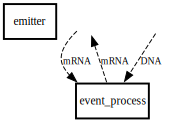

In [13]:
# visualize shows the process with its disconnected ports
b.visualize()

### print ports

In [14]:
b['event_process'].interface(True)

{ '_inputs': { 'DNA': {'A gene': 'float', 'B gene': 'float'},
               'mRNA': 'map[float]'},
  '_outputs': {'mRNA': 'map[float]'}}


### connect ports using connect_all
`Builder.connect_all` connects ports to stores of the same name.

In [15]:
b.connect_all(append_to_store_name='_store')
b

Builder({ 'emitter': { '_type': 'step',
               'address': 'local:ram-emitter',
               'config': {'emit': {}},
               'inputs': {},
               'instance': <process_bigraph.composite.RAMEmitter object at 0x1063e73d0>,
               'outputs': {}},
  'event_process': { '_type': 'process',
                     'address': 'local:GillespieEvent',
                     'config': {'kdeg': 1.0, 'ktsc': 5.0},
                     'inputs': {'DNA': ['DNA_store'], 'mRNA': ['mRNA_store']},
                     'instance': <process_bigraph.experiments.minimal_gillespie.GillespieEvent object at 0x10640b790>,
                     'interval': 1.0,
                     'outputs': {'mRNA': ['mRNA_store']}}})

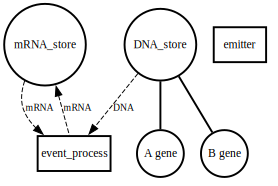

In [16]:
b.visualize()

### add interval process to the config

In [17]:
b['interval_process'].add_process(
    name='GillespieInterval',
)

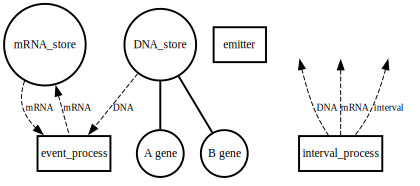

In [18]:
b.visualize()

### connect port to specific target

In [19]:
# to connect a port in a more targeted way, use connect and specify the port and its target path
b['interval_process'].connect(port='interval', target=['event_process', 'interval']) 

# the remaining ports can connect_all
b.connect_all() 

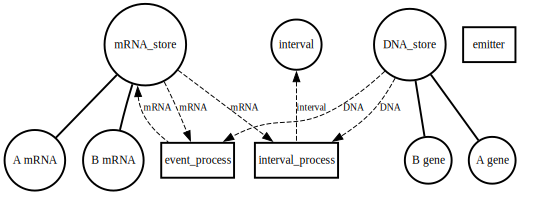

In [20]:
b.visualize()

### check current Builder config

In [21]:
b

Builder({ 'DNA_store': {'A gene': 0.0, 'B gene': 0.0},
  'emitter': { '_type': 'step',
               'address': 'local:ram-emitter',
               'config': {'emit': {}},
               'inputs': {},
               'instance': <process_bigraph.composite.RAMEmitter object at 0x1063e73d0>,
               'outputs': {}},
  'event_process': { '_type': 'process',
                     'address': 'local:GillespieEvent',
                     'config': {'kdeg': 1.0, 'ktsc': 5.0},
                     'inputs': {'DNA': ['DNA_store'], 'mRNA': ['mRNA_store']},
                     'instance': <process_bigraph.experiments.minimal_gillespie.GillespieEvent object at 0x10640b790>,
                     'interval': 1.0,
                     'outputs': {'mRNA': ['mRNA_store']}},
  'interval_process': { '_type': 'step',
                        'address': 'local:GillespieInterval',
                        'config': {'kdeg': 0.1, 'ktsc': 5.0},
                        'inputs': { 'DNA': ['DNA_store'],
    

## Update the initial state

In [22]:
initial_state = {
    'DNA_store': {
        'A gene': 2.0,
        'B gene': 1.0},
}
b.update(initial_state)

In [23]:
b

Builder({ 'DNA_store': {'A gene': 2.0, 'B gene': 1.0},
  'emitter': { '_type': 'step',
               'address': 'local:ram-emitter',
               'config': {'emit': {}},
               'inputs': {},
               'instance': <process_bigraph.composite.RAMEmitter object at 0x1063e73d0>,
               'outputs': {}},
  'event_process': { '_type': 'process',
                     'address': 'local:GillespieEvent',
                     'config': {'kdeg': 1.0, 'ktsc': 5.0},
                     'inputs': {'DNA': ['DNA_store'], 'mRNA': ['mRNA_store']},
                     'instance': <process_bigraph.experiments.minimal_gillespie.GillespieEvent object at 0x10640b790>,
                     'interval': 1.0,
                     'outputs': {'mRNA': ['mRNA_store']}},
  'interval_process': { '_type': 'step',
                        'address': 'local:GillespieInterval',
                        'config': {'kdeg': 0.1, 'ktsc': 5.0},
                        'inputs': { 'DNA': ['DNA_store'],
    

## Generate composite from builder config and simulate

In [24]:
composite = b.generate()
composite.run(10)

produced interval: {'interval': 5.68020763460701}
received interval: 5.68020763460701
produced interval: {'interval': 9.681534786044224}


In [25]:
composite.gather_results()

{}

## Retrieve the composite document

In [26]:
doc = b.document()
doc

{'emitter': {'_type': 'step',
  'address': 'local:ram-emitter',
  'config': {'emit': {}},
  'inputs': {},
  'outputs': {}},
 'event_process': {'_type': 'process',
  'address': 'local:GillespieEvent',
  'config': {'kdeg': 1.0, 'ktsc': 5.0},
  'inputs': {'mRNA': ['mRNA_store'], 'DNA': ['DNA_store']},
  'outputs': {'mRNA': ['mRNA_store']},
  'interval': 9.681534786044224},
 'mRNA_store': {'A mRNA': '2.0', 'B mRNA': '1.0'},
 'DNA_store': {'A gene': '2.0', 'B gene': '1.0'},
 'interval_process': {'_type': 'step',
  'address': 'local:GillespieInterval',
  'config': {'ktsc': 5.0, 'kdeg': 0.1},
  'inputs': {'DNA': ['DNA_store'], 'mRNA': ['mRNA_store']},
  'outputs': {'interval': ['event_process', 'interval']}},
 'global_time': '10.0'}

### save the document to file

In [27]:
b.write(filename='toy_bigraph')

File 'toy_bigraph' successfully written in 'out' directory.


### load a composite from document
This document represents the full state of the composite, and so can reproduce the previous composite when loaded into a fresh Builder

In [28]:
b2 = Builder(core=core, file_path='out/toy_bigraph.json')
b2

Builder({ 'DNA_store': {'A gene': 2.0, 'B gene': 1.0},
  'emitter': { '_type': 'step',
               'address': 'local:ram-emitter',
               'config': {'emit': {}},
               'inputs': {},
               'instance': <process_bigraph.composite.RAMEmitter object at 0x1064280a0>,
               'outputs': {}},
  'event_process': { '_type': 'process',
                     'address': 'local:GillespieEvent',
                     'config': {'kdeg': 1.0, 'ktsc': 5.0},
                     'inputs': {'DNA': ['DNA_store'], 'mRNA': ['mRNA_store']},
                     'instance': <process_bigraph.experiments.minimal_gillespie.GillespieEvent object at 0x106428220>,
                     'interval': 9.681534786044224,
                     'outputs': {'mRNA': ['mRNA_store']}},
  'global_time': '10.0',
  'interval_process': { '_type': 'step',
                        'address': 'local:GillespieInterval',
                        'config': {'kdeg': 0.1, 'ktsc': 5.0},
                       

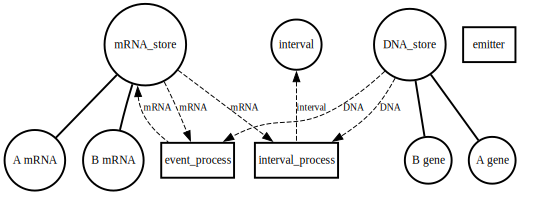

In [29]:
b2.visualize()